# Лабораторная работа 1: Введение в моделирование случайных процессов
Если вы испытываете трудности в работе с `python` или его библиотеками, то можете ознакомиться с курсом наших коллег из [Физтех.Статистика](https://mipt-stats.gitlab.io/) "[Python для анализа данных](https://mipt-stats.gitlab.io/courses/python.html)", а конкретно с лекциями:


*   [Работа в Jupyter Notebook, плагины, магические команды](https://mipt-stats.gitlab.io/courses/python/02_jupyter.html)
*   [Язык Python: числа, строки, списки](https://mipt-stats.gitlab.io/courses/python/03_python_1.html)
*   [Язык Python: кортежи, множества, словари, функции](https://mipt-stats.gitlab.io/courses/python/04_python_2.html)
*   [Библиотека Numpy](https://mipt-stats.gitlab.io/courses/python/05_numpy.html)
*   [Библиотека Matplotlib](https://mipt-stats.gitlab.io/courses/python/06_matplotlib.html)
*   [Библиотека scipy.stats](https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html)







In [205]:
# Не забудьте запустить этот кусок кода
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Генерация чисел и вычисление моментов
Сгенерируйте выборку из $1000$ элементов с равномерным распределением на отрезке $[0,1]$. Используйте готовые распределения из библиотеки `scipy.stats` Найдите среднее значение и выборочную дисперсию для этой выборки методами `numpy`. Результат выведите на экран.

In [206]:
size=1000
loc, scale = 0, 1
X = sps.uniform(loc=loc, scale=scale)

In [207]:
x = X.rvs(size=size)

In [208]:
np.mean(x)

0.5094018341612222

In [209]:
np.var(x)

0.08344950390300544

Сгенерируйте вторую выборку из $1000$ элементов с распределением Максвелла с параметрами $(0,1)$. Найдите выборочную ковариацию и коэффициент корреляции для двух полученных выборок методами `numpy`. Результат выведите на экран.

In [210]:
size = 1000
loc, scale = 0, 1
Y = sps.maxwell(loc=loc, scale=scale)

In [211]:
y = Y.rvs(size)

In [212]:
np.corrcoef(x, y)[0, 1]

-0.012800508303165847

In [213]:
np.cov(x, y)[0, 1]

-0.0025899792302664787

### Построение гистограммы
Сгенерируйте выборку из $10000$ значений, распределенных нормально $\mathcal{N}(2,3)$. На одном графике постройте гистограмму для полученной выборки и теоретическую плотность вероятности для распределения. Для построения гистограммы используйте готовый метод `hist` содержащийся в библиотеке `matplotlib.pyplot`. Теоретическую плотность вероятности получите с помощью метода `pdf` (probability density function) соответствующего распределения.

Повторите опыт для $10$, $30$, $100$ и $1000$ интервалов гистограммы. Оставьте то значение, которое, на ваш взгляд, является наиболее подходящим.

Оформите график. Добавьте название, легенду, подписи осей координат, сетку. Линию теоретической плотности вероятности сделайте красной, толщиной 3.


In [214]:
size = 1000
loc, scale = 2, 3
X = sps.norm(loc=2, scale=3)
x = X.rvs(size)

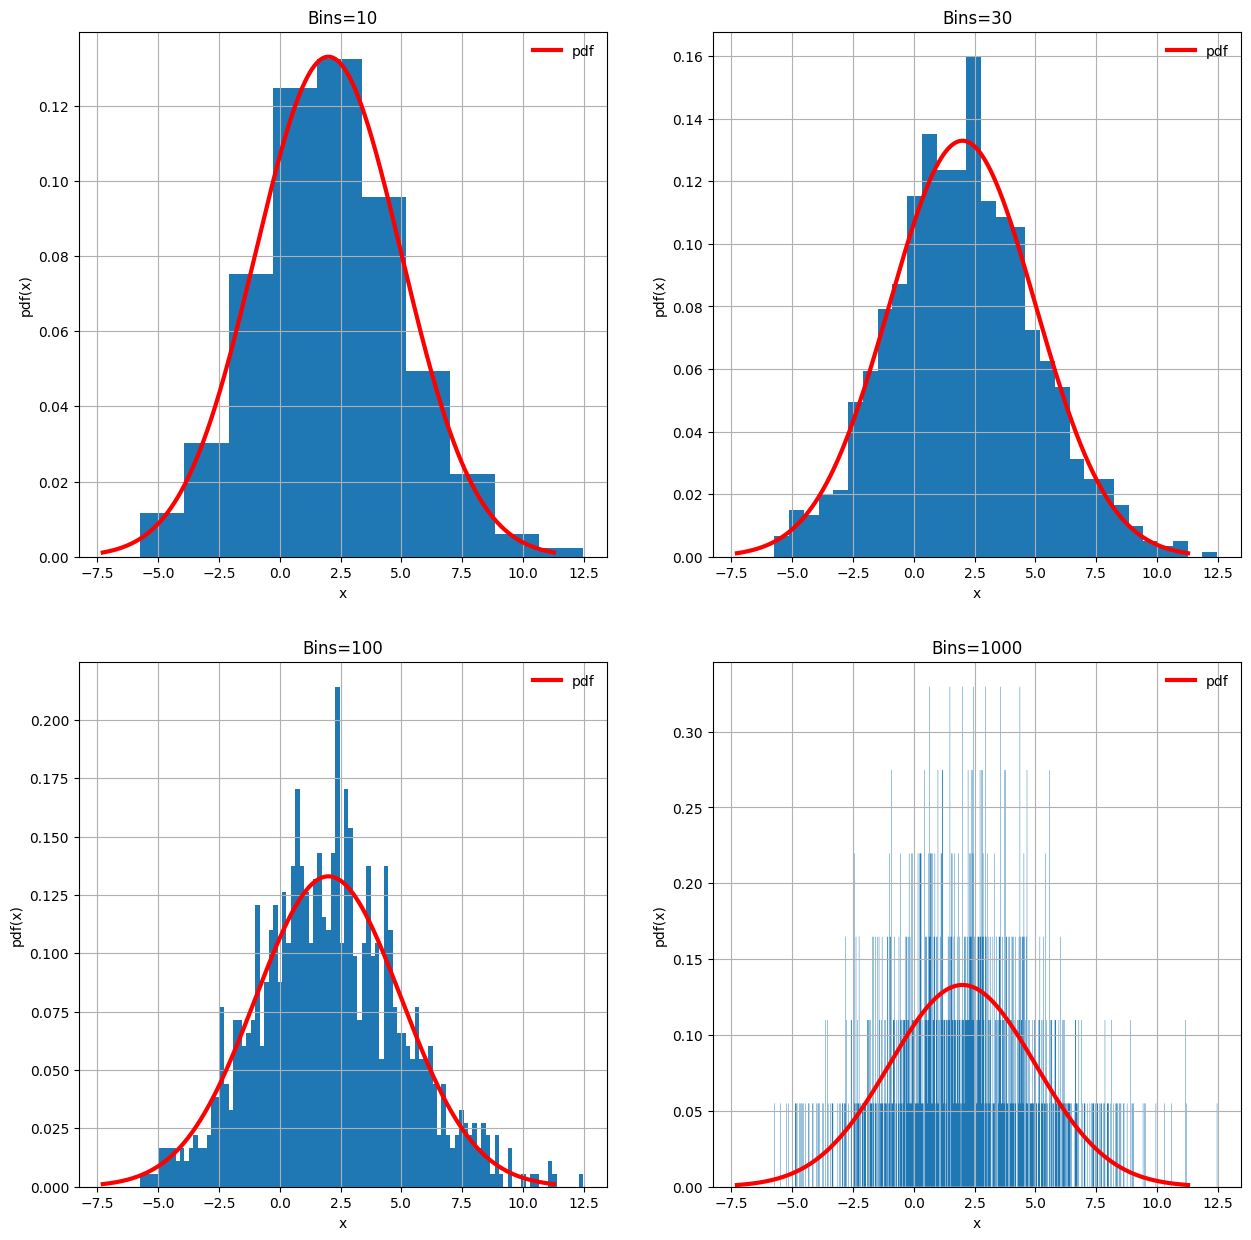

In [215]:
t = np.linspace(X.ppf(0.001), X.ppf(0.999), size)
bins = [10, 30, 100, 1000]

fig = plt.figure(figsize=(15, 15))
axes = [fig.add_subplot(2, 2, i) for i in range(1, 5)]
for i in range(4):
    axes[i].set_title(f'Bins={bins[i]}')

    axes[i].set_xlabel('x')
    axes[i].set_ylabel('pdf(x)')

    axes[i].hist(x, bins=bins[i], density=True, histtype='stepfilled')
    axes[i].plot(t, X.pdf(t), label='pdf', color='red', linewidth=3)
    axes[i].legend(loc='best', frameon=False)
    axes[i].grid()

Мне больше понравился $bins = 100$. На таких интервалах гистограмм лучше видны столбы

### Проверка ЦПТ
Сгенерируйте двумерную выборку размером $(n,m)$, где $n=100$, $m=10^6$ с экспоненциальным распределением $(0,3)$. Для этого удобно сгенерировать одномерную выборку длиной $n*m$, а после преобразовать её с помощь метода `reshape`.

Генерация такого объемного массива данных довольно ресурсоемкий процесс, поэтому воспользуемся преимуществом `jupyter notebook`, а именно возможность запуска кода поблочно. Это позволит нам сгенерировать выборку один раз, не повторяя этот процесс при каждом перезапуске последующего кода.

In [249]:
n, m = 100, int(1e6)
loc, scale = 0, 3
X = sps.expon(loc=loc, scale=scale)
x = X.rvs(size=n*m).reshape((n, m))

Теперь сформируйте выборку для случайных величин $\eta_k={\xi_1 + ...+\xi_k-k\dot M\xi\over{\sqrt{k\dot D\xi}}}$, где $k\in \{1,2,10,100\}$ состоящую из $m$ значений.

Для этого хорошо подходит метод `sum`, позволяющий суммировать многомерный массив по одной из координат, и возможность диапазонной индексации массива (как в `matlab`). Разумеется, возможно посчитать значения $\eta_k$ и с помощью обычных циклов, но совершение операций над массивами в `numpy` работает значительно быстрее.

In [250]:
k = np.array([1, 2, 10, 100]) - 1
eta = np.zeros_like(x)

In [280]:
for i in k:
    mu_i = np.sum(x[:i+1], axis=0)
    eta[i] = (mu_i - np.mean(mu_i)) / np.std(mu_i)

Теперь необходимо визуализировать полученные данные. Постройте график, на котором будет отображена плотность вероятности $\mathcal{N}(0,1)$.

Добавьте на график гистограммы $\eta_k$ для всех значений $k$. Для того чтобы гистограммы не перекрывали друг друга используйте атрибут `histtype='step'` метода `hist`.

Подберите число интервалов и толщину линий таким образом, чтобы график хорошо читался. Добавьте название, легенду, подписи осей координат, сетку.

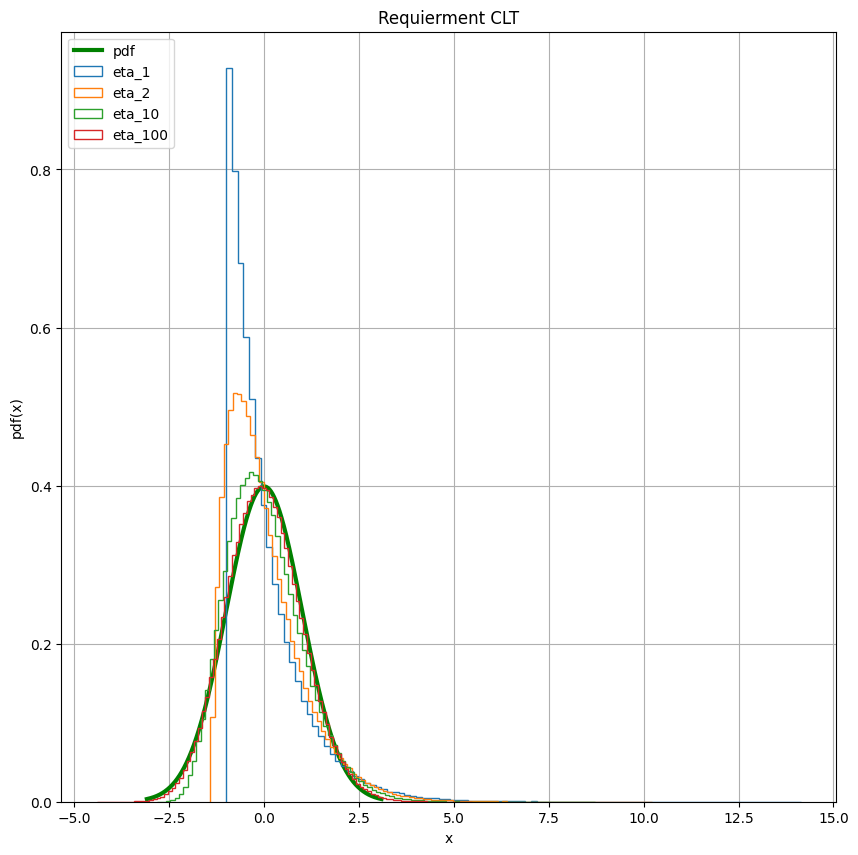

In [304]:
fig = plt.figure(figsize=(10, 10))

rv = sps.norm(loc=0, scale=1)
t = np.linspace(rv.ppf(0.001), rv.ppf(0.999), m)
ax = fig.add_subplot()
ax.set_title('Requierment CLT')
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')

ax.plot(t, rv.pdf(t), label='pdf', color='green', linewidth=3)
for i in k:
    ax.hist(eta[i], bins=100, histtype='step', density=True, label=f'eta_{i + 1}')
ax.legend(loc='best')
ax.grid()